In [1]:
# import libraries
from collections import Counter
import pandas as pd
import numpy as np
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE, ADASYN
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# load dataset
path = '/Users/Andy/Documents/_BeCode/becode_projects/DL-wine-quality/Wine Quality/wine.csv'
df = pd.read_csv(path)
df = df.drop(['index'],axis=1)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.shape

(6497, 12)

In [4]:
# create feature and target Data
# Input 'X' is all but the last column
# Output 'y' is the last column = 'quality'

X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

print(X.shape, y.shape)

(6497, 11) (6497,)


In [5]:
# split into train and test
# => Because there’s a class imbalance,
# we want to have equal distribution of all output classes in our train and test sets.
# To do that, we use the 'stratify' option in function 'train_test_split()'

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=69)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5197, 11)
(1300, 11)
(5197,)
(1300,)


In [6]:
# Normalize Input
# Neural networks need data that lies between the range of (0,1)
# To scale values, we’ll use the MinMaxScaler()
# Notice that we use .fit_transform() on X_train while we use .transform() on X_test.
# We do this because we want to scale the test set with the same parameters as that of the train set to avoid data leakage.
# .fit_transform calculates scaling values and applies them,
# while .transform only applies the calculated values.

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train, X_test

(array([[0.31404959, 0.16      , 0.21686747, ..., 0.38582677, 0.16853933,
         0.47826087],
        [0.26446281, 0.22666667, 0.11445783, ..., 0.51181102, 0.19101124,
         0.42028986],
        [0.49586777, 0.28      , 0.20481928, ..., 0.39370079, 0.21348315,
         0.24637681],
        ...,
        [0.23140496, 0.05333333, 0.24096386, ..., 0.62992126, 0.16853933,
         0.63768116],
        [0.23140496, 0.10666667, 0.1626506 , ..., 0.39370079, 0.16292135,
         0.17391304],
        [0.38842975, 0.06666667, 0.18072289, ..., 0.07086614, 0.07865169,
         0.28985507]]),
 array([[0.47933884, 0.4       , 0.14457831, ..., 0.31496063, 0.21348315,
         0.31884058],
        [0.2892562 , 0.08666667, 0.19879518, ..., 0.29133858, 0.16853933,
         0.31884058],
        [0.2231405 , 0.16666667, 0.43373494, ..., 0.27559055, 0.19662921,
         0.2173913 ],
        ...,
        [0.29752066, 0.05333333, 0.1626506 , ..., 0.12598425, 0.11797753,
         0.10144928],
        [0.2

In [7]:
# nbr of samples per class in y_train, y_test
print(f'y_test: {Counter(y_test)}')
print(f'y_train: {Counter(y_train)}')

y_test: Counter({6: 567, 5: 428, 7: 216, 4: 43, 8: 39, 3: 6, 9: 1})
y_train: Counter({6: 2269, 5: 1710, 7: 863, 4: 173, 8: 154, 3: 24, 9: 4})


In [8]:
# 'one hot' encode y_train_res, y_test
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)
y_train, y_test

(      3  4  5  6  7  8  9
 2811  0  0  0  1  0  0  0
 1284  0  0  1  0  0  0  0
 943   0  0  0  0  1  0  0
 4525  0  0  0  0  0  1  0
 5779  0  0  0  1  0  0  0
 ...  .. .. .. .. .. .. ..
 2713  0  1  0  0  0  0  0
 875   0  0  0  0  1  0  0
 1612  0  0  0  0  1  0  0
 1732  0  0  1  0  0  0  0
 5313  0  1  0  0  0  0  0
 
 [5197 rows x 7 columns],
       3  4  5  6  7  8  9
 475   0  0  1  0  0  0  0
 4459  0  0  0  1  0  0  0
 2245  0  1  0  0  0  0  0
 5487  0  0  0  1  0  0  0
 5410  0  0  1  0  0  0  0
 ...  .. .. .. .. .. .. ..
 2399  0  0  0  1  0  0  0
 2636  0  0  1  0  0  0  0
 5652  0  0  0  0  1  0  0
 2022  0  0  0  1  0  0  0
 4947  0  0  0  1  0  0  0
 
 [1300 rows x 7 columns])

In [9]:
# transform X_train, y_train and their test counterparts into pytorch tensors using torch.tensor()
# => before convert to np.array()
# make sure to convert them to float

X_train = torch.tensor(np.array(X_train), dtype=torch.float64)
y_train = torch.tensor(np.array(y_train), dtype=torch.float64)
X_test = torch.tensor(np.array(X_test), dtype=torch.float64)
y_test = torch.tensor(np.array(y_test), dtype=torch.float64)

In [10]:
X_train[:5]

tensor([[0.3140, 0.1600, 0.2169, 0.0153, 0.0515, 0.1076, 0.3433, 0.1136, 0.3858,
         0.1685, 0.4783],
        [0.2645, 0.2267, 0.1145, 0.0261, 0.1030, 0.0590, 0.0691, 0.1475, 0.5118,
         0.1910, 0.4203],
        [0.4959, 0.2800, 0.2048, 0.0261, 0.1412, 0.0312, 0.0899, 0.2223, 0.3937,
         0.2135, 0.2464],
        [0.1157, 0.0500, 0.1988, 0.0153, 0.0316, 0.0417, 0.1221, 0.0509, 0.4409,
         0.3483, 0.5652],
        [0.2231, 0.1533, 0.3675, 0.1902, 0.0731, 0.1042, 0.2696, 0.1922, 0.2756,
         0.1573, 0.1884]], dtype=torch.float64)

In [11]:
y_train[:5]

tensor([[0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0., 0., 0.]], dtype=torch.float64)

In [12]:
# define NN params
nb_hidden_neurons_1 = 288
nb_hidden_neurons_2 = int(nb_hidden_neurons_1 / 2)
nb_hidden_neurons_3 = int(nb_hidden_neurons_2 / 2)

nb_classes = len(pd.unique(df['quality']))
nb_features = X_train.shape[1]
nb_classes, nb_features

(7, 11)

In [13]:
# create NN architecture

import torch.nn as nn

class Network(nn.Module):

    def __init__(self, nb_features):
        """Here we define the layers
        """

        super().__init__()
        # class torch.nn.Linear(in_features: int, out_features: int, bias: bool = True = default)
        
        self.layer_1 = nn.Linear(nb_features, nb_hidden_neurons_1)  
        self.layer_2 = nn.Linear(nb_hidden_neurons_1, nb_hidden_neurons_2)
        self.layer_3 = nn.Linear(nb_hidden_neurons_2, nb_hidden_neurons_3)
        self.layer_4 = nn.Linear(nb_hidden_neurons_3, nb_classes)
        
        
    def forward(self,x):
        """Here we combine the layers
        """
        
        activation_function = nn.Sigmoid()  #nn.ReLU()
        last_layer_activation = nn.Softmax(dim=1)
        
        output_first_layer = activation_function(self.layer_1(x)) 
        output_second_layer = activation_function(self.layer_2(output_first_layer))
        output_third_layer = activation_function(self.layer_3(output_second_layer))
        prediction = last_layer_activation(self.layer_4(output_third_layer))
        
        return prediction

In [14]:
my_nn = Network(nb_features)
my_nn

Network(
  (layer_1): Linear(in_features=11, out_features=288, bias=True)
  (layer_2): Linear(in_features=288, out_features=144, bias=True)
  (layer_3): Linear(in_features=144, out_features=72, bias=True)
  (layer_4): Linear(in_features=72, out_features=7, bias=True)
)

In [15]:
# Select:
criterion =  nn.MSELoss()  #nn.BCELoss() # #nn.CrossEntropyLoss()

learning_rate = 0.0075
optimizer = torch.optim.Adam(my_nn.parameters(), learning_rate)

epochs = 1000
batch_size = 50

print(optimizer)

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.0075
    weight_decay: 0
)


In [16]:
# train NN

def training(batch_size : int, nb_steps_loss_sum : int):
    """ Train the neural network, feeding it `batch_size` at a time
    and saving statistics every `nb_steps_loss_sum` steps.
    
    Arguments:
    
    - batch_size [int] : the number of input samples at each training step (called a batch)
    - nb_steps_loss_sum [int] : the number of batches before saving the loss for plotting
    
    Returns:
    - loss_list : [List[double]] : value of the loss every `nb_steps_loss_sum` steps
    """

    loss_list = []
    running_loss = 0
    batch_nb = 0

    for epoch in range(0,epochs): # Number of times to iterate through the complete dataset
        for idx in range(0, X_train.shape[0], batch_size):
            
            # Get input and output
            input_batch = X_train[idx:idx + batch_size]
            target = y_train[idx:idx + batch_size]
            
            # TO COMPLETE:
            # - zero gradient buffers
            optimizer.zero_grad()
            
            # - compute the forward pass
            y_pred = my_nn(input_batch.float())
            
            # - compute the loss
            loss = criterion(y_pred, target.float())
            
            # - backpropagate
            loss.backward()
            
            # - do a step => update gradients
            optimizer.step()
          
            
            # Save the loss every `running_loss_steps` batches
            running_loss += loss.item()
            save_loss_condition = batch_nb % nb_steps_loss_sum == (nb_steps_loss_sum - 1)
            if save_loss_condition:    
                loss_list.append(running_loss)
                running_loss = 0.0


            batch_nb += 1
        
    return loss_list

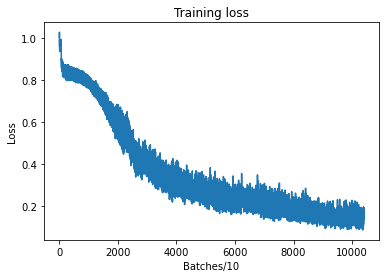

In [17]:
nb_steps_loss_sum = 10
batch_size = batch_size

loss = training(batch_size=batch_size, nb_steps_loss_sum=nb_steps_loss_sum)

# Plotting the loss over training
plt.figure()
plt.plot(range(0, len(loss)), loss)
plt.xlabel(f"Batches/{nb_steps_loss_sum}")
plt.ylabel("Loss")
plt.title("Training loss")
plt.show()
plt.close()

In [18]:
# compute the NN accuracy
def computeScore(X, y):
    
    correct = 0
    total = 0
    batch_size = 1
    
    with torch.no_grad():
        for idx in range(0, X.shape[0], batch_size):
            # TO COMPLETE:
            # - get the `batch_size` number of input samples
            input_batch = X[idx:idx + batch_size]
            target = y[idx:idx + batch_size]
            
            # - compute the prediction of the neural network
            y_pred = my_nn(input_batch.float())
            
            # - get the max of the prediction (e.g. get the most likely class)
            # This can be done using 'torch.max'
            y_pred_max = torch.max(y_pred, 1).indices
            
            # - get the max of the target (e.g. correct class)
            target_max = torch.max(target, 1).indices
            
            # - check if the prediction is correct and count it
            correct += (y_pred_max == target_max).sum().item()
            
            # - count every sample
            total += y_pred.size(0)     #+=batch_size
            
    accuracy = correct/total * 100
    
    print(y_pred, target)
    print(y_pred_max, target_max)
    print(correct, total)
    
    print(f'Accuracy of the network on the {total} samples: {accuracy:.2f}%')

In [19]:
computeScore(X_train, y_train)
computeScore(X_test, y_test)

tensor([[2.0215e-10, 8.9132e-01, 1.0867e-01, 1.0210e-06, 7.1169e-11, 2.9440e-16,
         8.1071e-08]]) tensor([[0., 1., 0., 0., 0., 0., 0.]], dtype=torch.float64)
tensor([1]) tensor([1])
4812 5197
Accuracy of the network on the 5197 samples: 92.59%
tensor([[1.6976e-16, 7.5028e-23, 8.6805e-15, 1.0000e+00, 1.6445e-10, 1.1558e-18,
         1.1599e-08]]) tensor([[0., 0., 0., 1., 0., 0., 0.]], dtype=torch.float64)
tensor([3]) tensor([3])
821 1300
Accuracy of the network on the 1300 samples: 63.15%
